In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rotations_utils import player_time_percentage, get_heatmap_dicts_df, get_dict_players_numbers
from pbp_utils import get_starters_of_game


# file_name = 'can_vs_bra.csv'
file_name = 'USA-Canada.csv'
all_pbp = pd.read_csv(file_name)
team1 = file_name.split('-')[0].upper()
team2 = file_name.split('-')[1].split('.')[0].upper()
if team2 == 'CANADA':
    team2 = 'CAN'
print(team1, team2)
all_pbp.head()

USA CAN


,Team,Team_Flag_Src,Score_A,Score_B,Period,Time,Number,Player,Action_Description,Total_Seconds,...,X_0_j_B,X_1_j_B,X_2_j_B,X_3_j_B,X_7_j_B,X_9_j_B,X_13_j_B,X_15_j_B,X_23_j_B,X_24_j_B
0,CAN,https://www.fiba.basketball/api/img/team/logof...,0,0,Q1,10:00,7.0,Dwight Powell,jump ball won,2700.0,...,1,0,1,0,1,1,0,0,0,1
1,USA,https://www.fiba.basketball/api/img/team/logof...,0,0,Q1,10:00,14.0,Walker Kessler,jump ball lost,2700.0,...,1,0,1,0,1,1,0,0,0,1
2,CAN,https://www.fiba.basketball/api/img/team/logof...,0,2,Q1,9:37,24.0,Dillon Brooks,2pt hook shot made,2677.0,...,1,0,1,0,1,1,0,0,0,1
3,USA,https://www.fiba.basketball/api/img/team/logof...,0,2,Q1,9:15,14.0,Walker Kessler,offensive rebound,2655.0,...,1,0,1,0,1,1,0,0,0,1
4,USA,https://www.fiba.basketball/api/img/team/logof...,0,2,Q1,9:15,10.0,Anthony Edwards,2pt driving layup missed,2655.0,...,1,0,1,0,1,1,0,0,0,1


In [11]:
dict_players_numbers  =  get_dict_players_numbers(all_pbp, team1)
dict_players_numbers

{14.0: 'Walker Kessler',
 10.0: 'Anthony Edwards',
 5.0: 'Mikal Bridges',
 15.0: 'Austin Reaves',
 11.0: 'Jalen Brunson',
 12.0: 'Josh Hart',
 9.0: 'Bobby Portis Jr',
 4.0: 'Tyrese Haliburton',
 6.0: 'Cameron Johnson'}

In [12]:
time_percentages_df1, time_percentages_df2, time_percentages_df3, time_percentages_df4 = get_heatmap_dicts_df(all_pbp, 'A', team1, dict_players_numbers)
time_percentages_df1

/Users/nildenver/Desktop/Canada Team/Canada-Team-Olympics/rotations_utils.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df['Unnamed: 0'] = player_df.index
/Users/nildenver/Desktop/Canada Team/Canada-Team-Olympics/rotations_utils.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df['Unnamed: 0'] = player_df.index
/Users/nildenver/Desktop/Canada Team/Canada-Team-Olympics/rotations_utils.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,10-9,9-8,8-7,7-6,6-5,5-4,4-3,3-2,2-1,1-0
name_player,,,,,,,,,,
Walker Kessler,1.000000,1.0,1.000000,1.000000,1.0,1.0,0.083333,0.000000,0.000000,0.0
Anthony Edwards,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.000000,0.716667,0.000000,0.0
Mikal Bridges,0.766667,0.0,0.133333,1.000000,1.0,1.0,1.000000,1.000000,0.866667,0.0
Austin Reaves,0.233333,1.0,0.866667,0.383333,1.0,1.0,1.000000,1.000000,1.000000,1.0
Jalen Brunson,1.000000,1.0,1.000000,1.000000,1.0,1.0,0.083333,0.000000,0.000000,0.0
Josh Hart,1.000000,1.0,1.000000,0.616667,0.0,0.0,0.000000,0.283333,1.000000,1.0
Bobby Portis Jr,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.916667,1.000000,1.000000,1.0
Tyrese Haliburton,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.916667,1.000000,1.000000,1.0
Cameron Johnson,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.133333,1.0


In [13]:
starters_A, starters_B, boxscore_A, boxscore_B = get_starters_of_game('https://www.fiba.basketball/basketballworldcup/2023/game/1009/USA-Canada')

/Users/nildenver/Desktop/Canada Team/Canada-Team-Olympics/pbp_utils.py:93: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  boxscore_A = pd.read_html(str(tableA))[0]
/Users/nildenver/Desktop/Canada Team/Canada-Team-Olympics/pbp_utils.py:100: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  boxscore_B = pd.read_html(str(tableB))[0]


In [14]:
players_order_A = starters_A + [p for p in boxscore_A.sort_values('Min', ascending=False).Players.tolist() if p not in starters_A and p not in ['Totals', 'Team/Coaches']]
players_order_B = starters_B + [p for p in boxscore_B.sort_values('Min', ascending=False).Players.tolist() if p not in starters_B and p not in ['Totals', 'Team/Coaches']]
players_order_A

['Mikal Bridges',
 'Anthony Edwards',
 'Jalen Brunson',
 'Josh Hart',
 'Walker Kessler',
 'Austin Reaves',
 'Tyrese Haliburton',
 'Bobby Portis Jr',
 'Cameron Johnson']

In [15]:
# Calculate the time difference in minutes
all_pbp_no_end_q = all_pbp[(all_pbp.Action_Description!='End of quarter')].copy()
all_pbp_no_end_q['minute'] = all_pbp_no_end_q['Time'].apply(lambda x: int(x.split(':')[0]))
all_pbp_no_end_q.loc[all_pbp_no_end_q.minute==10, 'minute'] = 9
all_pbp_no_end_q['diferential_past_row'] = all_pbp_no_end_q['Score_A'].shift() - all_pbp_no_end_q['Score_B'].shift()
all_pbp_no_end_q.loc[all_pbp_no_end_q.index[0], 'diferential_past_row'] = 0
all_pbp_no_end_q['+/-'] = all_pbp_no_end_q['Score_A'] - all_pbp_no_end_q['Score_B']
heatmap_plus_minus = all_pbp_no_end_q.groupby(['quarter','minute']).apply(lambda x: (x['Score_A'].iloc[-1] - x['Score_B'].iloc[-1])-(x['diferential_past_row'].iloc[0])).reset_index()
heatmap_plus_minus = heatmap_plus_minus.rename(columns={0: 'plusminus'})

/var/folders/tg/9lndc6jj2nj2j6zsv7pmzgrc0000gn/T/ipykernel_74864/2498265463.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  heatmap_plus_minus = all_pbp_no_end_q.groupby(['quarter','minute']).apply(lambda x: (x['Score_A'].iloc[-1] - x['Score_B'].iloc[-1])-(x['diferential_past_row'].iloc[0])).reset_index()


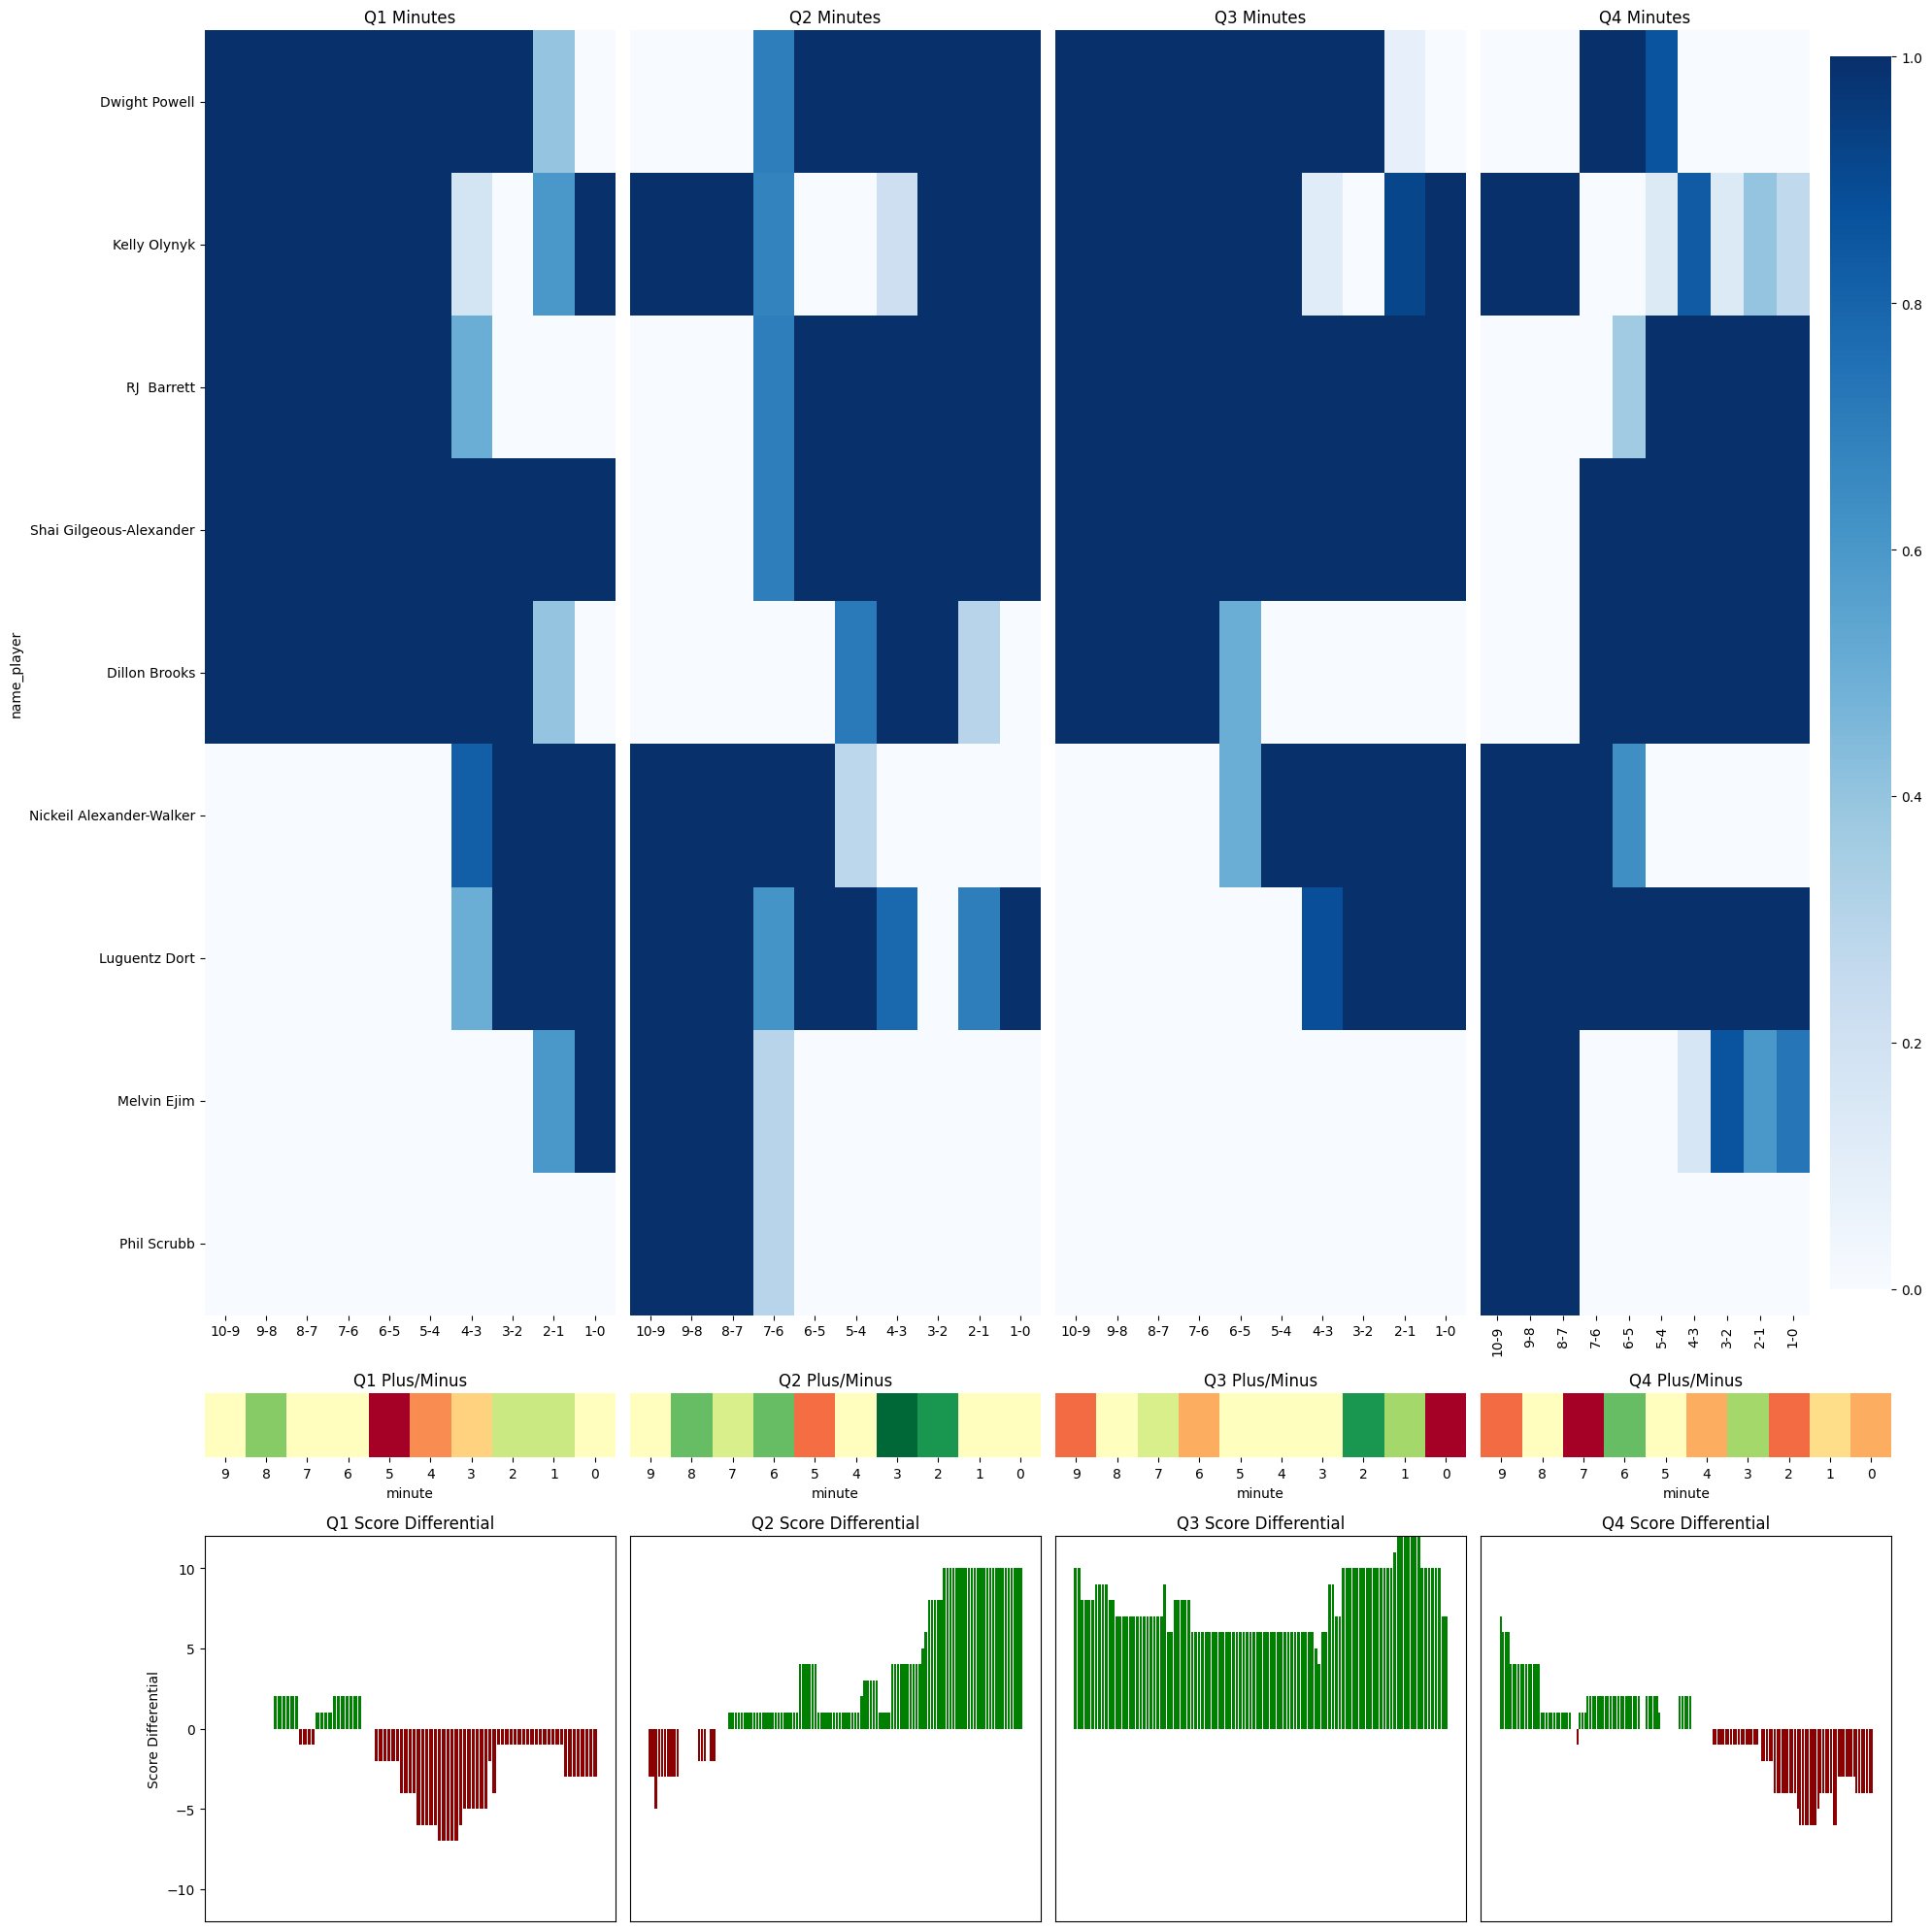

In [48]:
from rotations_utils import final_plot_for_team
final_plot_for_team('https://www.fiba.basketball/basketballworldcup/2023/game/0109/Canada-Brazil', all_pbp, team1, 'A')

## with matplotlib

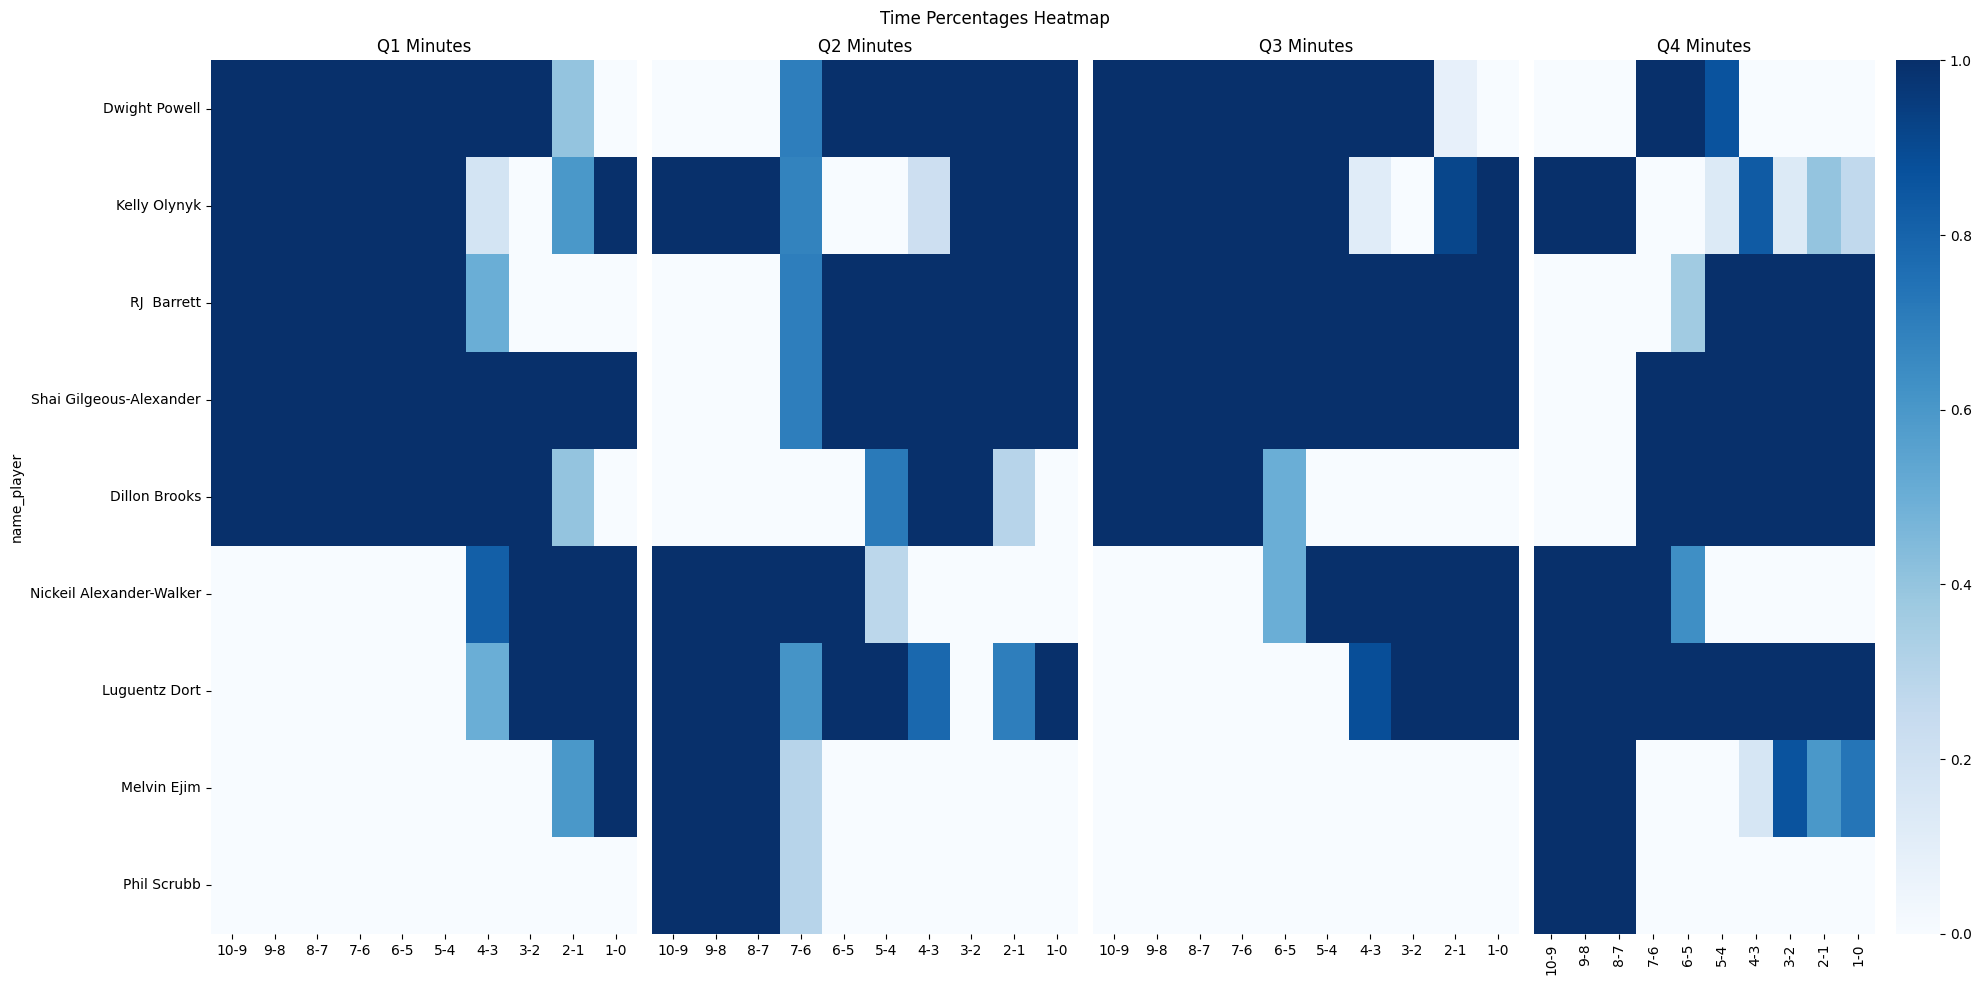

In [42]:
from plots_utils import plot_plusminus_heatmap_seaborn, plot_heatmap_seaborn, plot_game_diff_seaborn, all_plots_game
plot_heatmap_seaborn(time_percentages_df1, time_percentages_df2, time_percentages_df3, time_percentages_df4)

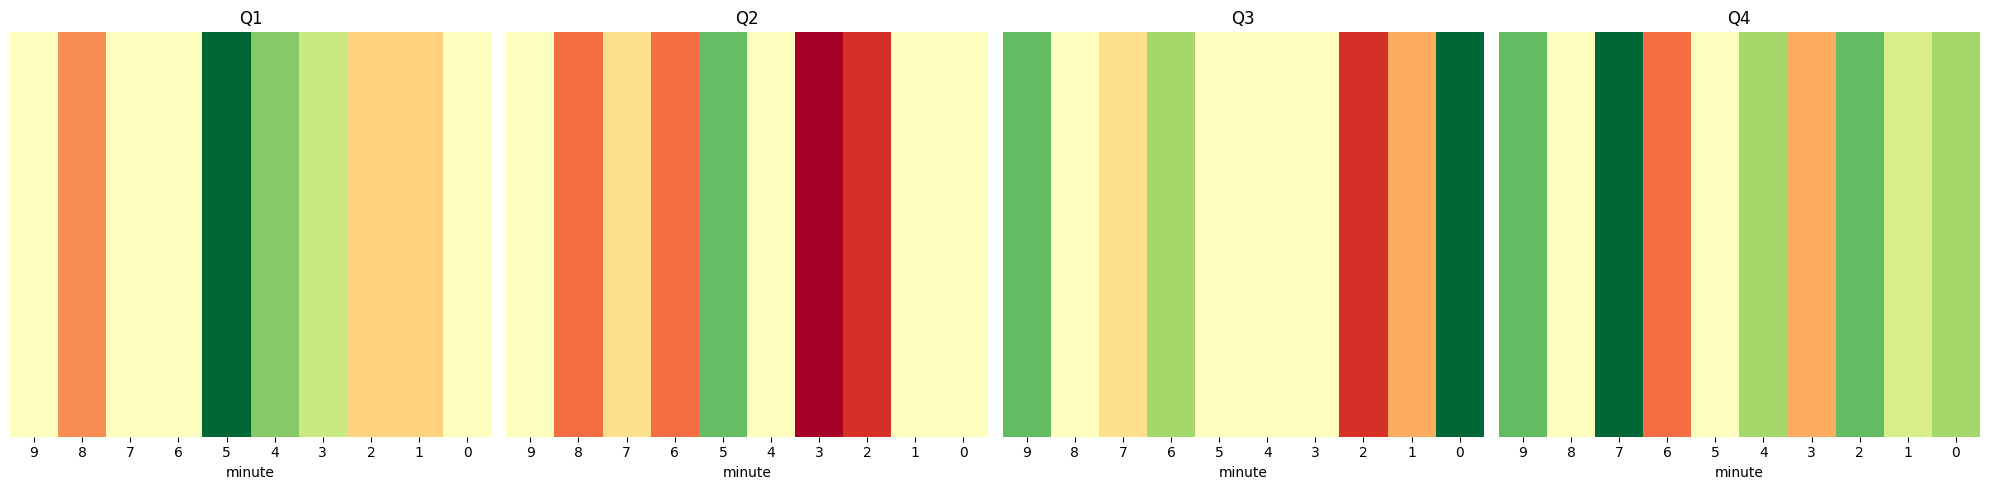

In [43]:
plot_plusminus_heatmap_seaborn(heatmap_plus_minus)

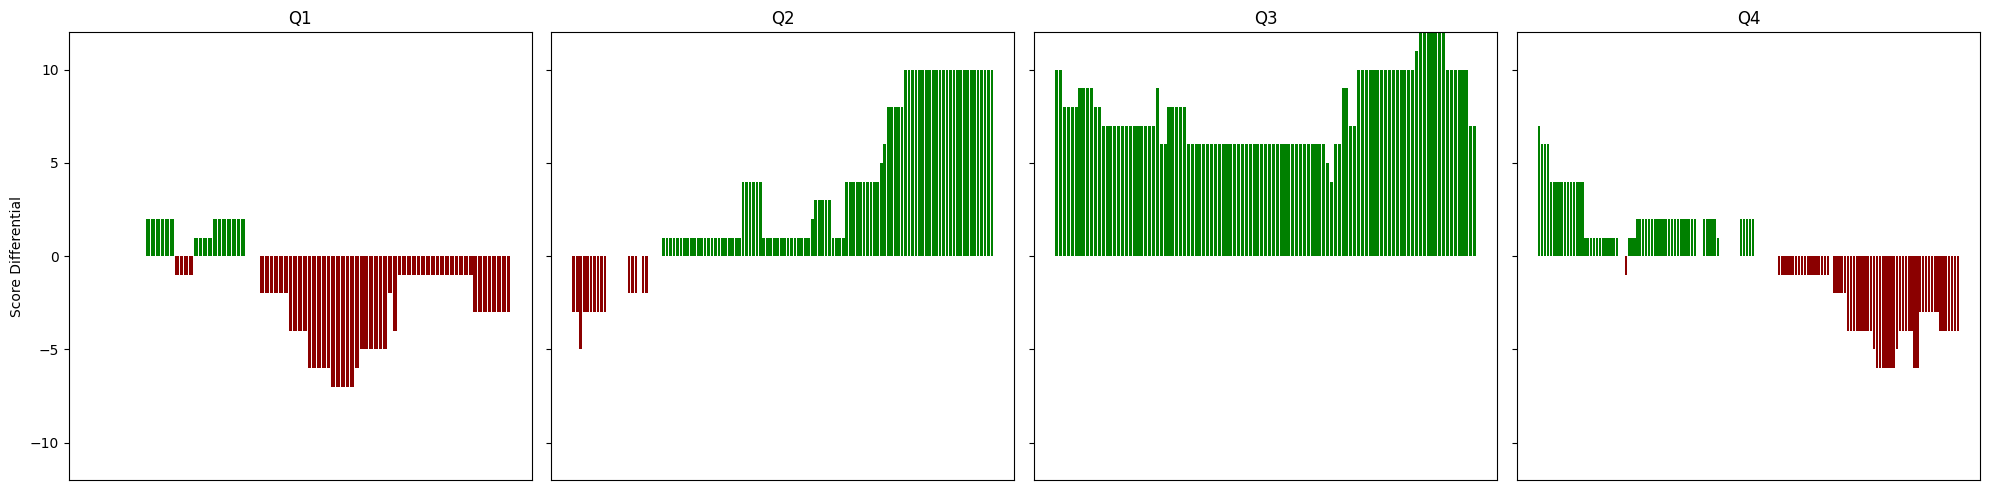

In [44]:
plot_game_diff_seaborn(all_pbp_no_end_q)

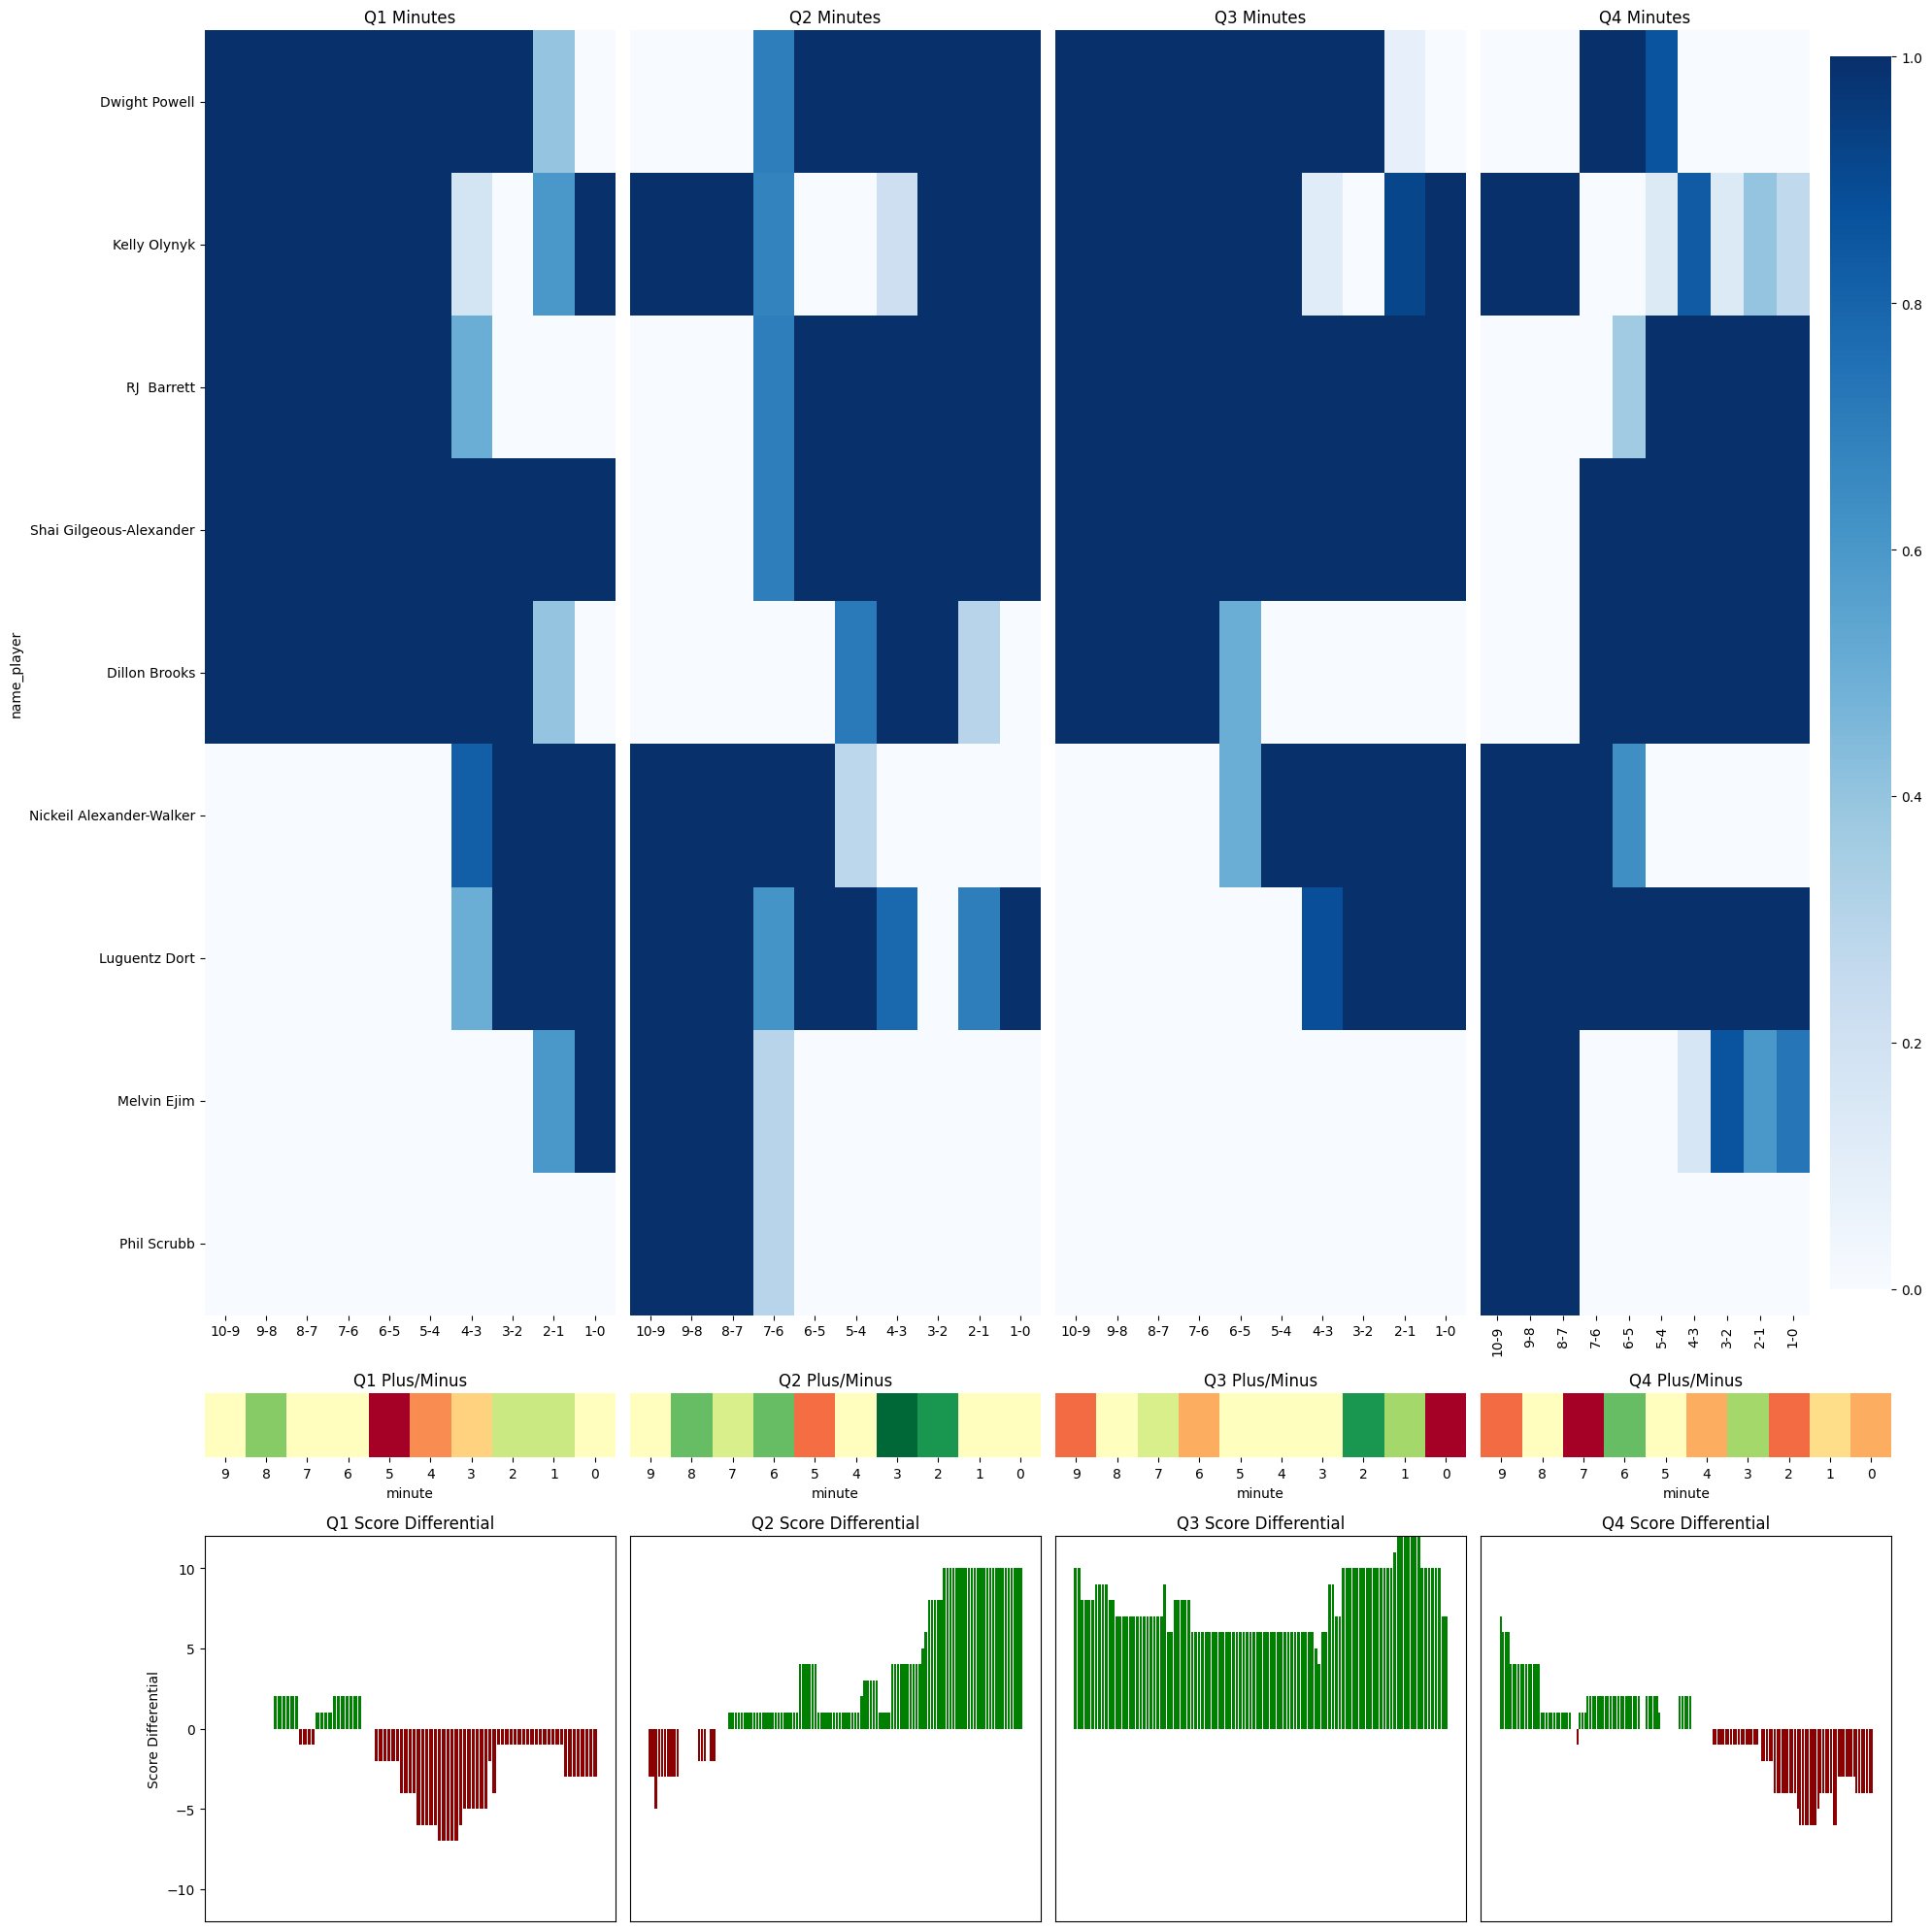

In [45]:
from plots_utils import all_plots_game
all_plots_game(time_percentages_df1, time_percentages_df2, time_percentages_df3, time_percentages_df4, heatmap_plus_minus, all_pbp_no_end_q)

## with altair

In [17]:
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'range' is the column you want to reorder
# custom_order = ['40-39', '39-38', '38-37', '37-36', '36-35', '35-34', '34-33', '33-32', '32-31', '31-30','30',
#                 '30-29', '29-28', '28-27', '27-26', '26-25', '25-24', '24-23', '23-22', '22-21', '21-20','20',
#                 '20-19', '19-18', '18-17', '17-16', '16-15', '15-14', '14-13', '13-12', '12-11', '11-10','10',
#                 '10-9', '9-8', '8-7', '7-6', '6-5', '5-4', '4-3', '3-2', '2-1', '1-0']
custom_order = ['10-9', '9-8', '8-7', '7-6', '6-5', '5-4', '4-3', '3-2', '2-1', '1-0']

# Convert the time_percentages_df DataFrame to long format
time_percentages_long1 = time_percentages_df1.reset_index().melt(id_vars='name_player', var_name='Time Interval', value_name='Percentage')

time_percentages_long2 = time_percentages_df2.reset_index().melt(id_vars='name_player', var_name='Time Interval', value_name='Percentage')

time_percentages_long3 = time_percentages_df3.reset_index().melt(id_vars='name_player', var_name='Time Interval', value_name='Percentage')

time_percentages_long4 = time_percentages_df4.reset_index().melt(id_vars='name_player', var_name='Time Interval', value_name='Percentage')

# Create the heatmap using Altair
# Create the first quarter heatmap
heatmap1 = alt.Chart(time_percentages_long1).mark_rect().encode(
    x=alt.X('Time Interval:O', sort=custom_order, title='Q1 Minutes',axis=alt.Axis(ticks=True, labels=False)),
    y=alt.Y('index:O', sort=players_order_A, title='Player'),
    color=alt.Color('Percentage:Q', scale=alt.Scale(scheme='lightorange'), title='Percentage')
).properties(
    width=200,
    height=300,
)

# Create the second quarter heatmap
heatmap2 = alt.Chart(time_percentages_long2).mark_rect().encode(
    x=alt.X('Time Interval:O', sort=custom_order, title='Q2 Minutes', axis=alt.Axis(ticks=True, labels=False)),
    y=alt.Y('index:O', sort=players_order_A, title='Player', axis=None),
    color=alt.Color('Percentage:Q', scale=alt.Scale(scheme='lightorange'), title='Percentage')
).properties(
    width=200,
    height=300,
)

# Create the third quarter heatmap
heatmap3 = alt.Chart(time_percentages_long3).mark_rect().encode(
    x=alt.X('Time Interval:O', sort=custom_order, title='Q3 Minutes', axis=alt.Axis(ticks=True, labels=False)),
    y=alt.Y('index:O', sort=players_order_A,  title='Player', axis=None),
    color=alt.Color('Percentage:Q', scale=alt.Scale(scheme='lightorange'), title='Percentage')
).properties(
    width=200,
    height=300,
)

# Create the fourth quarter heatmap
heatmap4 = alt.Chart(time_percentages_long4).mark_rect().encode(
    x=alt.X('Time Interval:O', sort=custom_order, title='Q4 Minutes', axis=alt.Axis(ticks=True, labels=False)),
    y=alt.Y('index:O', sort=players_order_A, title='Player', axis=None),
    color=alt.Color('Percentage:Q', scale=alt.Scale(scheme='lightorange'), title='Percentage')
).properties(
    width=200,
    height=300,
)


# Concatenate the heatmaps horizontally and make them share the y-axis
heatmaps = alt.hconcat(heatmap1, heatmap2,heatmap3, heatmap4, spacing=5).resolve_axis(y='shared')

title = 'Time Percentages Heatmap'
# Show the concatenated heatmaps
heatmaps.show()

alt.HConcatChart(...)

In [16]:
import altair as alt
#create a heatmap with heatmap_plus_minus with diverging scale and vconcat it with the heatmaps above
heatmap_plus_minus_chart1 = alt.Chart(heatmap_plus_minus[heatmap_plus_minus.quarter==1]).mark_rect().encode(
    x=alt.X('minute:O', sort= 'descending', title='Q1'),
    y=alt.Y('quarter:O', axis=alt.Axis(ticks=False, labels=False), title='Score Differential'),
    color=alt.Color('plusminus:Q', scale=alt.Scale(scheme='lightgreyred'))
).properties(
    width=200,
    height=25,
)

heatmap_plus_minus_chart2 = alt.Chart(heatmap_plus_minus[heatmap_plus_minus.quarter==2]).mark_rect().encode(
    x=alt.X('minute:O', sort= 'descending', title='Q2'),
    y=alt.Y('quarter:O', axis=alt.Axis(ticks=False, labels=False), title=None),
    color=alt.Color('plusminus:Q', scale=alt.Scale(scheme='lightgreyred'))
).properties(
    width=200,
    height=25,
)

heatmap_plus_minus_chart3 = alt.Chart(heatmap_plus_minus[heatmap_plus_minus.quarter==3]).mark_rect().encode(
    x=alt.X('minute:O', sort= 'descending', title='Q3'),
    y=alt.Y('quarter:O', axis=alt.Axis(ticks=False, labels=False), title=None),
    color=alt.Color('plusminus:Q', scale=alt.Scale(scheme='lightgreyred'))
).properties(
    width=200,
    height=25,
)

heatmap_plus_minus_chart4 = alt.Chart(heatmap_plus_minus[heatmap_plus_minus.quarter==4]).mark_rect().encode(
    x=alt.X('minute:O', sort= 'descending', title='Q4'),
    y=alt.Y('quarter:O', axis=alt.Axis(ticks=False, labels=False), title=None),
    color=alt.Color('plusminus:Q', scale=alt.Scale(scheme='lightgreyred'))
).properties(
    width=200,
    height=25,
)

# vconcat_chart = alt.vconcat(heatmaps, heatmap_plus_minus_chart)

# vconcat_chart
plusminus = alt.hconcat(heatmap_plus_minus_chart1, heatmap_plus_minus_chart2, heatmap_plus_minus_chart3, heatmap_plus_minus_chart4, spacing=10).resolve_scale(color='shared')
plusminus.show()

alt.HConcatChart(...)

In [15]:
import altair as alt

# Create a custom legend
legend_data = pd.DataFrame({'Country': ['Canada', 'Brazil'], 'color': ['red', 'green']})

# Create the color marks for the legend
color_marks = alt.Chart(legend_data).mark_rect().encode(
    y=alt.Y('Country:N', axis=None),
    color=alt.Color('color:N', scale=None)
)

# Create the text marks for the legend
text_marks = alt.Chart(legend_data).mark_text().encode(
    y=alt.Y('Country:N', axis=None),
    text='Country:N'
)

# Combine the color marks and the text marks
custom_legend = alt.layer(color_marks, text_marks)


# Create the chart with the custom legend
chart = alt.Chart(all_pbp_no_end_q[all_pbp_no_end_q.quarter==1].reset_index()).mark_bar().encode(
    x=alt.X("index:O", axis=alt.Axis(labels=False, ticks=False), title='Q1'),
    y=alt.Y("+/-:Q", axis = alt.Axis(title='Score Differential'), scale=alt.Scale(domain=[-15, 15])),
    color=alt.condition(
        alt.datum['+/-'] > 0,
        alt.value("darkred"),  # The positive color
        alt.value("darkblue")  # The negative color
    )
).properties(height=100, width=200)


chart2 = alt.Chart(all_pbp_no_end_q[all_pbp_no_end_q.quarter==2].reset_index()).mark_bar().encode(
    x=alt.X("index:O", axis=alt.Axis(labels=False, ticks=False), title='Q2'),
    y=alt.Y("+/-:Q", axis = alt.Axis(labels=False, ticks=False), title=None),
    color=alt.condition(
        alt.datum['+/-'] > 0,
        alt.value("darkred"),  # The positive color
        alt.value("darkblue")  # The negative color
    )
).properties(height=100, width=200)


chart3 = alt.Chart(all_pbp_no_end_q[all_pbp_no_end_q.quarter==3].reset_index()).mark_bar().encode(
    x=alt.X("index:O", axis=alt.Axis(labels=False, ticks=False), title='Q3'),
    y=alt.Y("+/-:Q", axis = alt.Axis(labels=False, ticks=False), title=None),
    color=alt.condition(
        alt.datum['+/-'] > 0,
        alt.value("darkred"),  # The positive color
        alt.value("darkblue")  # The negative color
    )
).properties(height=100, width=200)


chart4 = alt.Chart(all_pbp_no_end_q[all_pbp_no_end_q.quarter==4].reset_index()).mark_bar().encode(
    x=alt.X("index:O", axis=alt.Axis(labels=False, ticks=False), title='Q4'),
    y=alt.Y("+/-:Q", axis = alt.Axis(labels=False, ticks=False), title=None),
    color=alt.condition(
        alt.datum['+/-'] > 0,
        alt.value("darkred"),  # The positive color
        alt.value("darkblue")  # The negative color
    )
).properties(height=100, width=200)

# Combine the chart and the custom legend
combined_chart = alt.hconcat(chart, chart2, chart3, chart4, spacing=10).resolve_scale(y='shared')

combined_chart


alt.HConcatChart(...)

In [14]:
alt.vconcat(heatmaps, plusminus, combined_chart, spacing=10).resolve_scale(x='independent', y='independent', color='independent').properties(title='Score Differential and Plus-Minus Heatmap')

alt.VConcatChart(...)

## for brazil


In [31]:
import math
def find_missing(indices):
    missing_ranges = []
    start = None
    for i in range(indices[0], indices[-1]):
        if i not in indices:
            if start is None:
                start = i
        elif start is not None:
            missing_ranges.append((start, i-1))
            start = None
    if start is not None:
        missing_ranges.append((start, indices[-1]))
    return missing_ranges


def get_first_last_time(player_df, quarter):
    # Get the first and last row of the player dataframe
    first_row = player_df.iloc[0]
    last_row = player_df.iloc[-1]

    # Extract the time information from the first and last row
    first_time = first_row['Time']
    last_time = last_row['Time']

    # Extract the minutes from the time strings
    first_minute = int(first_time.split(':')[0])
    last_minute = int(last_time.split(':')[0])

    # print(first_minute_, last_minute_)
    # print(first_time, last_time)

    # first_minute = 10*(4-quarter) + first_minute_
    # last_minute = 10*(4-quarter) + last_minute_

    # print(first_minute, last_minute)
    return first_minute, last_minute, first_time, last_time

def compute_difference(heatmap_dict, player_number, first_minute, last_minute, first_time, last_time):
    # Compute the time difference
    for i in range(first_minute, last_minute, -1):
        if i not in [first_minute, last_minute+1]:
            heatmap_dict[player_number][f'{i}-{i-1}'] = 1
        else:
            if i == first_minute:
                if int(first_time.split(':')[1]) == 0:
                    percentage_played = 1
                else:
                    percentage_played = int(first_time.split(':')[1])/60
            elif i == last_minute+1:
                percentage_played = (60 - int(last_time.split(':')[1]))/60
            heatmap_dict[player_number][f'{i}-{i-1}'] = percentage_played
    return heatmap_dict

def player_time_percentage(heatmap_dict, all_pbp, player_number, team, quarter):
    
    heatmap_dict[player_number] = {}
    # Filter the dataframe for the specified player and team
    player_df = all_pbp[(all_pbp['X_' + str(player_number) + '_j_' + team] == 1)&(all_pbp.quarter == quarter)]

    for i in range(10, 0, -1): 
        heatmap_dict[player_number][f'{i}-{i-1}'] = 0

        
    if len(player_df) > 0:

        # Check if the indices are continuous
        if player_df.index[-1] - player_df.index[0] != len(player_df) - 1:
            missing_ranges = find_missing(player_df.index)
            for start, end in missing_ranges:
                for i in range(2):
                    if i == 0:
                        first_minute, last_minute, first_time, last_time = get_first_last_time(player_df[player_df.index<=end], quarter)
                        heatmap_dict = compute_difference(heatmap_dict, player_number, first_minute, last_minute, first_time, last_time)
                    else:
                        first_minute, last_minute, first_time, last_time = get_first_last_time(player_df[player_df.index>=start], quarter)
                        heatmap_dict = compute_difference(heatmap_dict, player_number, first_minute, last_minute, first_time, last_time)

        else:
            first_minute, last_minute, first_time, last_time = get_first_last_time(player_df, quarter)
            heatmap_dict = compute_difference(heatmap_dict, player_number, first_minute, last_minute, first_time, last_time)


        
    

    return heatmap_dict


In [32]:
import numpy as np
team = 'B'
heatmap_dict1 = {}
for player_number in all_pbp[all_pbp['Team'] == 'BRA']['Number'].unique():
    if np.isnan(player_number) == False:
        heatmap_dict1 = player_time_percentage(heatmap_dict1, all_pbp, int(player_number), team, 1)

heatmap_dict2 = {}
for player_number in all_pbp[all_pbp['Team'] == 'BRA']['Number'].unique():
    if np.isnan(player_number) == False:
        heatmap_dict2 = player_time_percentage(heatmap_dict2, all_pbp, int(player_number), team, 2)
    
heatmap_dict3 = {}
for player_number in all_pbp[all_pbp['Team'] == 'BRA']['Number'].unique():
    if np.isnan(player_number) == False:
        heatmap_dict3 = player_time_percentage(heatmap_dict3, all_pbp, int(player_number), team, 3)

heatmap_dict4 = {}
for player_number in all_pbp[all_pbp['Team'] == 'BRA']['Number'].unique():
    if np.isnan(player_number) == False:
        heatmap_dict4 = player_time_percentage(heatmap_dict4, all_pbp, int(player_number), team, 4)


In [34]:
# Convert the time_percentages dictionary to a DataFrame
time_percentages_df1 = pd.DataFrame.from_dict(heatmap_dict1).T
time_percentages_df2 = pd.DataFrame.from_dict(heatmap_dict2).T
time_percentages_df3 = pd.DataFrame.from_dict(heatmap_dict3).T
time_percentages_df4 = pd.DataFrame.from_dict(heatmap_dict4).T

In [36]:
unique_number_name = all_pbp[(all_pbp.Team == 'BRA')&(~all_pbp.Number.isnull())][['Number', 'Player']].drop_duplicates()
dict_players_numbers  = dict(zip(unique_number_name['Number'], unique_number_name['Player']))
dict_players_numbers

{50.0: 'Bruno Caboclo',
 10.0: 'Tim Soares',
 2.0: 'Yago Santos',
 14.0: 'Leonardo Meindl',
 32.0: 'Georginho De Paula',
 99.0: 'Lucas Dias',
 9.0: 'Marcelinho Huertas',
 11.0: 'Gui Santos',
 8.0: 'Vítor Benite',
 6.0: 'Cristiano Felicio'}

In [39]:
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'range' is the column you want to reorder
# custom_order = ['40-39', '39-38', '38-37', '37-36', '36-35', '35-34', '34-33', '33-32', '32-31', '31-30','30',
#                 '30-29', '29-28', '28-27', '27-26', '26-25', '25-24', '24-23', '23-22', '22-21', '21-20','20',
#                 '20-19', '19-18', '18-17', '17-16', '16-15', '15-14', '14-13', '13-12', '12-11', '11-10','10',
#                 '10-9', '9-8', '8-7', '7-6', '6-5', '5-4', '4-3', '3-2', '2-1', '1-0']
custom_order = ['10-9', '9-8', '8-7', '7-6', '6-5', '5-4', '4-3', '3-2', '2-1', '1-0']

# Convert the time_percentages_df DataFrame to long format
time_percentages_long1 = time_percentages_df1.reset_index().melt(id_vars='index', var_name='Time Interval', value_name='Percentage')
time_percentages_long1['index'] = time_percentages_long1['index'].apply(lambda x: dict_players_numbers[x])

time_percentages_long2 = time_percentages_df2.reset_index().melt(id_vars='index', var_name='Time Interval', value_name='Percentage')
time_percentages_long2['index'] = time_percentages_long2['index'].apply(lambda x: dict_players_numbers[x])

time_percentages_long3 = time_percentages_df3.reset_index().melt(id_vars='index', var_name='Time Interval', value_name='Percentage')
time_percentages_long3['index'] = time_percentages_long3['index'].apply(lambda x: dict_players_numbers[x])

time_percentages_long4 = time_percentages_df4.reset_index().melt(id_vars='index', var_name='Time Interval', value_name='Percentage')
time_percentages_long4['index'] = time_percentages_long4['index'].apply(lambda x: dict_players_numbers[x])

# Create the heatmap using Altair
# Create the first quarter heatmap
heatmap1 = alt.Chart(time_percentages_long1).mark_rect().encode(
    x=alt.X('Time Interval:O', sort=custom_order, title='Q1 Minutes',axis=alt.Axis(ticks=True, labels=False)),
    y=alt.Y('index:O', title='Player'),
    color=alt.Color('Percentage:Q', scale=alt.Scale(scheme='greens'), title='Percentage')
).properties(
    width=200,
    height=300,
)

# Create the second quarter heatmap
heatmap2 = alt.Chart(time_percentages_long2).mark_rect().encode(
    x=alt.X('Time Interval:O', sort=custom_order, title='Q2 Minutes', axis=alt.Axis(ticks=True, labels=False)),
    y=alt.Y('index:O', title='Player', axis=None),
    color=alt.Color('Percentage:Q', scale=alt.Scale(scheme='greens'), title='Percentage')
).properties(
    width=200,
    height=300,
)

# Create the third quarter heatmap
heatmap3 = alt.Chart(time_percentages_long3).mark_rect().encode(
    x=alt.X('Time Interval:O', sort=custom_order, title='Q3 Minutes', axis=alt.Axis(ticks=True, labels=False)),
    y=alt.Y('index:O', title='Player', axis=None),
    color=alt.Color('Percentage:Q', scale=alt.Scale(scheme='greens'), title='Percentage')
).properties(
    width=200,
    height=300,
)

# Create the fourth quarter heatmap
heatmap4 = alt.Chart(time_percentages_long4).mark_rect().encode(
    x=alt.X('Time Interval:O', sort=custom_order, title='Q4 Minutes', axis=alt.Axis(ticks=True, labels=False)),
    y=alt.Y('index:O', title='Player', axis=None),
    color=alt.Color('Percentage:Q', scale=alt.Scale(scheme='greens'), title='Percentage')
).properties(
    width=200,
    height=300,
)


# Concatenate the heatmaps horizontally and make them share the y-axis
heatmaps = alt.hconcat(heatmap1, heatmap2,heatmap3, heatmap4, spacing=5).resolve_axis(y='shared')

title = 'Time Percentages Heatmap'
# Show the concatenated heatmaps
heatmaps.show()

alt.HConcatChart(...)

## most used lineups

In [40]:
all_pbp

,Unnamed: 0,Team,Team_Flag_Src,Score_A,Score_B,Period,Time,Number,Player,Action_Description,...,X_2_j_B,X_6_j_B,X_8_j_B,X_9_j_B,X_10_j_B,X_11_j_B,X_14_j_B,X_32_j_B,X_50_j_B,X_99_j_B
0,0,BRA,https://www.fiba.basketball/api/img/team/logof...,0,0,Q1,10:00,50.0,Bruno Caboclo,jump ball lost,...,1,0,0,0,1,0,1,1,1,0
1,1,CAN,https://www.fiba.basketball/api/img/team/logof...,0,0,Q1,10:00,7.0,Dwight Powell,jump ball won,...,1,0,0,0,1,0,1,1,1,0
2,2,CAN,https://www.fiba.basketball/api/img/team/logof...,0,0,Q1,9:37,13.0,Kelly Olynyk,2pt driving layup missed,...,1,0,0,0,1,0,1,1,1,0
3,3,CAN,https://www.fiba.basketball/api/img/team/logof...,0,0,Q1,9:37,7.0,Dwight Powell,offensive rebound,...,1,0,0,0,1,0,1,1,1,0
4,4,BRA,https://www.fiba.basketball/api/img/team/logof...,0,0,Q1,9:30,50.0,Bruno Caboclo,defensive rebound,...,1,0,0,0,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,466,BRA,https://www.fiba.basketball/api/img/team/logof...,65,69,Q4,0:00,50.0,Bruno Caboclo,Substitution out,...,1,0,1,1,0,0,0,1,1,0
467,467,CAN,https://www.fiba.basketball/api/img/team/logof...,65,69,Q4,0:00,3.0,Melvin Ejim,Substitution out,...,1,0,1,1,0,0,0,1,1,0
468,468,CAN,https://www.fiba.basketball/api/img/team/logof...,65,69,Q4,0:00,13.0,Kelly Olynyk,Substitution in,...,1,0,1,1,0,0,0,1,1,0
469,469,BRA,https://www.fiba.basketball/api/img/team/logof...,65,69,Q4,0:00,11.0,Gui Santos,Substitution in,...,1,0,1,1,0,1,0,0,1,0


In [48]:
def get_lineup(row, team):
    # Find the columns where the value is 1 and the column name starts with 'X_' and ends with '_A'
    return [dict_players_numbers[int(col.split('_')[1])] for col in row.index if row[col] == 1 and col.startswith('X_') and col.endswith(f'_{team}')]

# Apply the function to each row to create the new 'lineup' column
all_pbp['lineup'] = all_pbp.apply(get_lineup, team='B', axis=1)
# get_lineup(all_pbp.iloc[0], 'B')

In [53]:
# Calculate the time difference in minutes
# all_pbp = all_pbp[(all_pbp.Action_Description!='End of quarter')].copy()
all_pbp['minute'] = all_pbp['Time'].apply(lambda x: int(x.split(':')[0]))
all_pbp.loc[all_pbp.minute==10, 'minute'] = 9
all_pbp['diferential_past_row'] = all_pbp['Score_A'].shift() - all_pbp['Score_B'].shift()
all_pbp['diferential_past_row'].iloc[0] = 0
all_pbp['+/-'] = all_pbp['Score_A'] - all_pbp['Score_B']

/var/folders/tg/9lndc6jj2nj2j6zsv7pmzgrc0000gn/T/ipykernel_17966/2565449145.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_pbp['diferential_past_row'].iloc[0] = 0


In [57]:
all_pbp['lineup']

0      [Yago Santos, Tim Soares, Leonardo Meindl, Geo...
1      [Yago Santos, Tim Soares, Leonardo Meindl, Geo...
2      [Yago Santos, Tim Soares, Leonardo Meindl, Geo...
3      [Yago Santos, Tim Soares, Leonardo Meindl, Geo...
4      [Yago Santos, Tim Soares, Leonardo Meindl, Geo...
                             ...                        
466    [Yago Santos, Vítor Benite, Marcelinho Huertas...
467    [Yago Santos, Vítor Benite, Marcelinho Huertas...
468    [Yago Santos, Vítor Benite, Marcelinho Huertas...
469    [Yago Santos, Vítor Benite, Marcelinho Huertas...
470    [Yago Santos, Vítor Benite, Marcelinho Huertas...
Name: lineup, Length: 471, dtype: object

In [59]:
all_pbp.iloc[0]

Unnamed: 0                                                              0
Team                                                                  BRA
Team_Flag_Src           https://www.fiba.basketball/api/img/team/logof...
Score_A                                                                 0
Score_B                                                                 0
Period                                                                 Q1
Time                                                                10:00
Number                                                               50.0
Player                                                      Bruno Caboclo
Action_Description                                         jump ball lost
Total_Seconds                                                      2400.0
quarter                                                                 1
time_elapsed                                                          NaN
X_0_j_A                               

In [63]:
def compute_differential(row, team):
    if team == 'A':

        return (row['Score_A'] - row['past_score_A']) - (row['Score_B'] - row['past_score_B'])
    elif team == 'B':
        return (row['Score_B'] - row['past_score_B']) - (row['Score_A'] - row['past_score_A'])

all_pbp['past_score_A'] = all_pbp['Score_A'].shift()
all_pbp['past_score_B'] = all_pbp['Score_B'].shift()
all_pbp['differential_from_A'] = all_pbp.apply(compute_differential, team='A', axis=1)
all_pbp['differential_from_B'] = all_pbp.apply(compute_differential, team='B', axis=1)


In [78]:
# Convert the 'lineup' column to a tuple
all_pbp['lineup_tuple'] = all_pbp['lineup'].apply(tuple)

import pandas as pd

# Perform the groupby operations and assign the results to variables
differential_sum = all_pbp.groupby('lineup_tuple').differential_from_B.sum()
time_elapsed_sum = all_pbp.groupby('lineup_tuple').time_elapsed.sum()

# Concatenate the results along the column axis
result = pd.concat([differential_sum, time_elapsed_sum], axis=1)

# Rename the columns
result.columns = ['differential_sum', 'time_elapsed_sum']
result.reset_index(inplace=True)

In [79]:
pd.set_option('display.max_colwidth', 1000)  # replace 1000 with the desired width

In [85]:
result[result.time_elapsed_sum != 0].sort_values('differential_sum', ascending=False)

,lineup_tuple,differential_sum,time_elapsed_sum
26,"(Yago Santos, Vítor Benite, Tim Soares, Gui Santos, Lucas Dias)",10.0,368.0
18,"(Yago Santos, Tim Soares, Leonardo Meindl, Georginho De Paula, Bruno Caboclo)",9.0,620.0
12,"(Yago Santos, Gui Santos, Georginho De Paula, Bruno Caboclo, Lucas Dias)",3.0,222.0
13,"(Yago Santos, Gui Santos, Leonardo Meindl, Georginho De Paula, Bruno Caboclo)",2.0,19.0
17,"(Yago Santos, Tim Soares, Gui Santos, Leonardo Meindl, Georginho De Paula)",2.0,13.0
4,"(Marcelinho Huertas, Tim Soares, Leonardo Meindl, Georginho De Paula, Bruno Caboclo)",0.0,40.0
6,"(Tim Soares, Gui Santos, Leonardo Meindl, Georginho De Paula, Bruno Caboclo)",0.0,3.0
9,"(Yago Santos, Cristiano Felicio, Gui Santos, Leonardo Meindl, Georginho De Paula)",0.0,41.0
10,"(Yago Santos, Cristiano Felicio, Leonardo Meindl, Georginho De Paula, Lucas Dias)",0.0,10.0
5,"(Tim Soares, Gui Santos, Georginho De Paula, Bruno Caboclo, Lucas Dias)",0.0,4.0
